In [1]:
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt

import torchvision.transforms.functional as TF

In [2]:
from utils.data import SegmentationDataset

## Exploring how to perform augmentation on point mask

In [3]:
dataset = SegmentationDataset('data_glas_0005/train/')

Segmentation dataset (training) initialized with 76 images.
Supervision mode: point-level


In [4]:
img, segments, adjacency, mask, point_mask = dataset[0]

In [5]:
mask = np.array(mask)
point_mask = np.array(point_mask)

In [6]:
img = np.array(TF.to_pil_image(img))

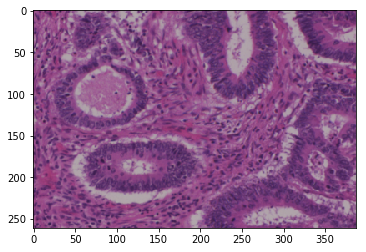

In [7]:
plt.imshow(img)

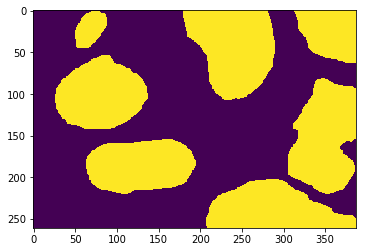

In [8]:
plt.imshow(mask[..., 1])

In [9]:
np.unique(mask)

array([0, 1])

In [10]:
np.unique(point_mask)

array([0, 1])

In [11]:
point_mask.sum()

198

In [12]:
point_mask.shape

(261, 387, 2)

In [13]:
COLORS = (
    (0, 0, 255),
    (255, 0, 0),
    (0, 255, 0),
)

In [14]:
img.shape

(261, 387, 3)

In [15]:
new_img = img.copy()
for x, y in zip(*np.where(point_mask.sum(axis=-1) > 0)):
    point = point_mask[x, y]
    if point.sum() > 0:
        class_ = point.argmax()
        cv2.circle(new_img, (y, x), 3, COLORS[class_], -1)

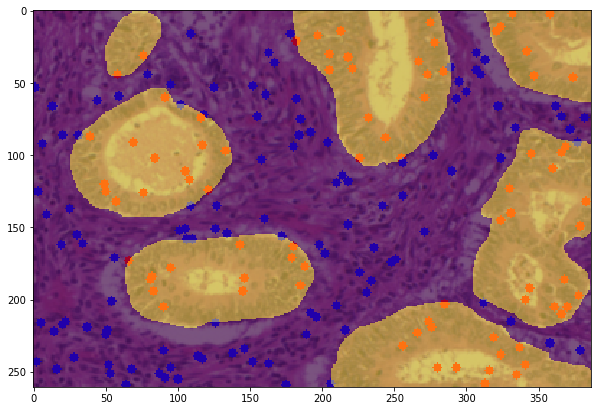

In [19]:
plt.figure(figsize=(10, 8))
plt.imshow(new_img)
plt.imshow(mask[..., 1], alpha=0.5)